<a href="https://colab.research.google.com/github/Avik-G/Transport-Demand-Prediction-Using-Regression/blob/main/Capstone_Project_2_Transport_Demand_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Project Title : Traffic Jam: Predicting People's Movement into Nairobi**

##**Problem Description**

This challenge asks to build a model that predicts the number of seats that Mobiticket can expect to sell for each ride, i.e. for a specific route on a specific date and time. There are 14 routes in this dataset. All of the routes end in Nairobi and originate in towns to the North-West of Nairobi towards Lake Victoria.

The towns from which these routes originate are:
- Awendo
- Homa Bay
- Kehancha
- Kendu Bay
- Keroka
- Keumbu
- Kijauri
- Kisii
- Mbita
- Migori
- Ndhiwa
- Nyachenge
- Oyugis
- Rodi
- Rongo
- Sirare
- Sori

**The routes from these 14 origins to the first stop in the outskirts of Nairobi takes approximately 8 to 9 hours from time of departure. From the first stop in the outskirts of Nairobi into the main bus terminal, where most passengers get off, in Central Business District, takes another 2 to 3 hours depending on traffic.**

**The three stops that all these routes make in Nairobi (in order) are:**
1. Kawangware: the first stop in the outskirts of Nairobi
2. Westlands
3. Afya Centre: the main bus terminal where most passengers disembark

**All of these points are mapped here.**

*Passengers of these bus (or shuttle) rides are affected by Nairobi traffic not only during their ride into the city, but from there they must continue their journey to their final destination in Nairobi wherever that may be. Traffic can act as a deterrent for those who have the option to avoid buses that arrive in Nairobi during peak traffic hours. On the other hand, traffic may be an indication for people’s movement patterns, reflecting business hours, cultural events, political events, and holidays.*

**Data Description**

**Nairobi Transport Data.csv (zipped) is the dataset of tickets purchased from Mobiticket for the 14 routes from “up country” into Nairobi between 17 October 2017 and 20 April 2018. This dataset includes the variables: ride_id, seat_number, payment_method, payment_receipt, travel_date, travel_time, travel_from, travel_to, car_type, max_capacity.**

**Uber Movement traffic data can be accessed here. Data is available for Nairobi through June 2018. Uber Movement provided historic hourly travel time between any two points in Nairobi. Any tables that are extracted from the Uber Movement platform can be used in your model.**

**Variables description:**
- ride_id: unique ID of a vehicle on a specific route on a specific day and time.
- seat_number: seat assigned to ticket
- payment_method: method used by customer to purchase ticket from Mobiticket (cash or Mpesa)
- payment_receipt: unique id number for ticket purchased from Mobiticket
- travel_date: date of ride departure. (MM/DD/YYYY)
- travel_time: scheduled departure time of ride. Rides generally depart on time. (hh:mm)
- travel_from: town from which ride originated
- travel_to: destination of ride. All rides are to Nairobi.
- car_type: vehicle type (shuttle or bus)
- max_capacity: number of seats on the vehicle

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime

In [23]:
df_1=pd.read_csv('/content/drive/MyDrive/DS/ML_Regression/Transport Demand Prediction/train_revised.csv')

In [24]:
# checking Head of the Dataframe using .head() function
df_1.head(5)

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49


##**Data Pre Processing**

In [25]:
# Checking information of d1_1
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51645 entries, 0 to 51644
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ride_id          51645 non-null  int64 
 1   seat_number      51645 non-null  object
 2   payment_method   51645 non-null  object
 3   payment_receipt  51645 non-null  object
 4   travel_date      51645 non-null  object
 5   travel_time      51645 non-null  object
 6   travel_from      51645 non-null  object
 7   travel_to        51645 non-null  object
 8   car_type         51645 non-null  object
 9   max_capacity     51645 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 3.9+ MB


In [5]:
# Checking rows and columns present in df_1
df_1.shape

(51645, 10)

In [6]:
# Checking describtion of df_1 it gives count,mean,std,min etc
df_1.describe()

,ride_id,max_capacity
count,51645.000000,51645.000000
mean,10188.645793,34.534321
std,2211.295708,18.451193
min,1442.000000,11.000000
25%,8287.000000,11.000000
50%,10353.000000,49.000000
75%,12029.000000,49.000000
max,20117.000000,49.000000


In [9]:
# Checking describtion of df_1 including all object data types
df_1.describe(include = 'object')

,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type
count,51645,51645,51645,51645,51645,51645,51645,51645
unique,61,2,51645,149,78,17,1,2
top,1,Mpesa,UZUEHCBUSO,10-12-17,7:09,Kisii,Nairobi,Bus
freq,2065,51532,1,856,3926,22607,51645,31985


In [8]:
#Checking Null values
df_1.isnull().sum()

ride_id            0
seat_number        0
payment_method     0
payment_receipt    0
travel_date        0
travel_time        0
travel_from        0
travel_to          0
car_type           0
max_capacity       0
dtype: int64

##**Data Visualization**


In [7]:
plt.rcParams["figure.figsize"] = [10, 5]

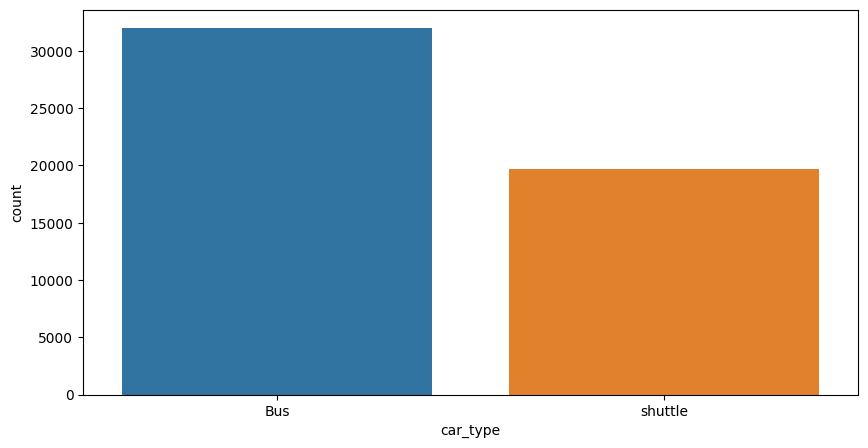

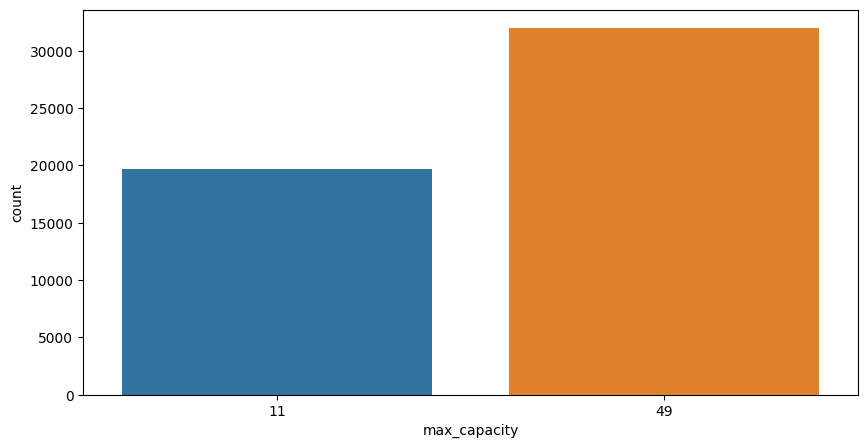

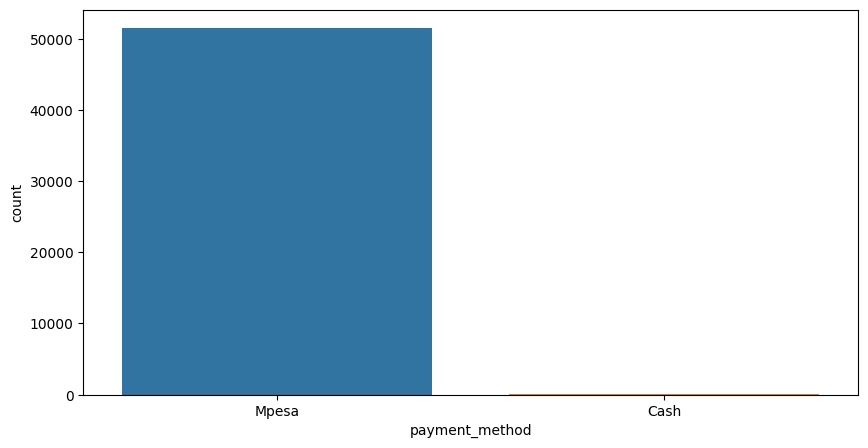

In [27]:
#Getting Insights of Data by plotting countplot
plots_count_columns=['car_type','max_capacity','payment_method']
for plots in plots_count_columns:
    sns.countplot(x=plots, data=df_1)
    plt.show()


Inference:

- There are two type of cars . The most used is Bus with Maximun capacity of 49.
- There are two modes of payments Mpesa and Cash. The most used is Mpesa.

In [ ]:
#plotting Histplot and Boxplot graphs

<Axes: >

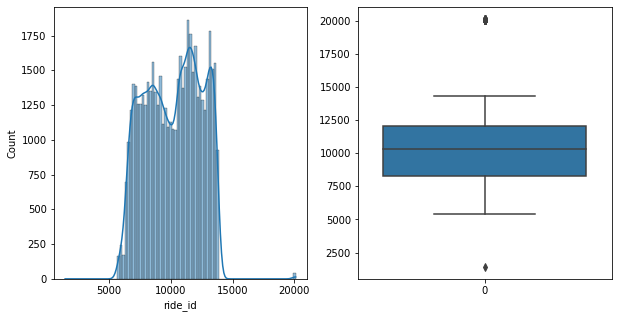

In [ ]:
fig, axes = plt.subplots(1,2,figsize=(10,5))
sns.histplot(df_1['ride_id'], kde= True, ax=axes[0])
sns.boxplot(df_1['ride_id'], ax=axes[1])

<Axes: >

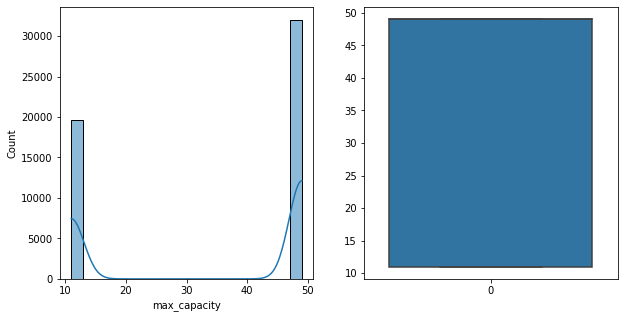

In [ ]:
fig, axes = plt.subplots(1,2,figsize=(10,5))
sns.histplot(df_1['max_capacity'],kde = True, ax=axes[0])
sns.boxplot(df_1['max_capacity'], ax=axes[1])

Inference: Maximum Capacity of Bus is 49

<function matplotlib.pyplot.show(close=None, block=None)>

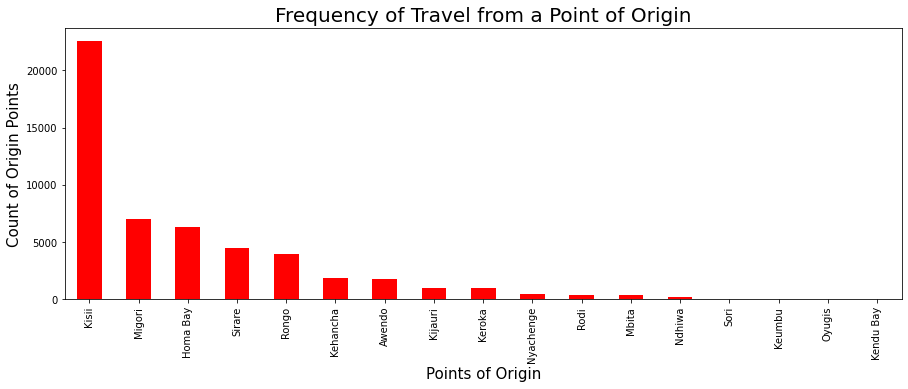

In [ ]:
#Plotting countplot to count max values
df_1['travel_from'].value_counts().plot(kind = 'bar', figsize =(15,5), color = 'r')
plt.ylabel('Count of Origin Points', fontsize = 15)
plt.xlabel('Points of Origin', fontsize = 15)
plt.xticks()
plt.title('Frequency of Travel from a Point of Origin', fontsize = 20)
plt.show


Inference: Maximum People travelling from Kissi

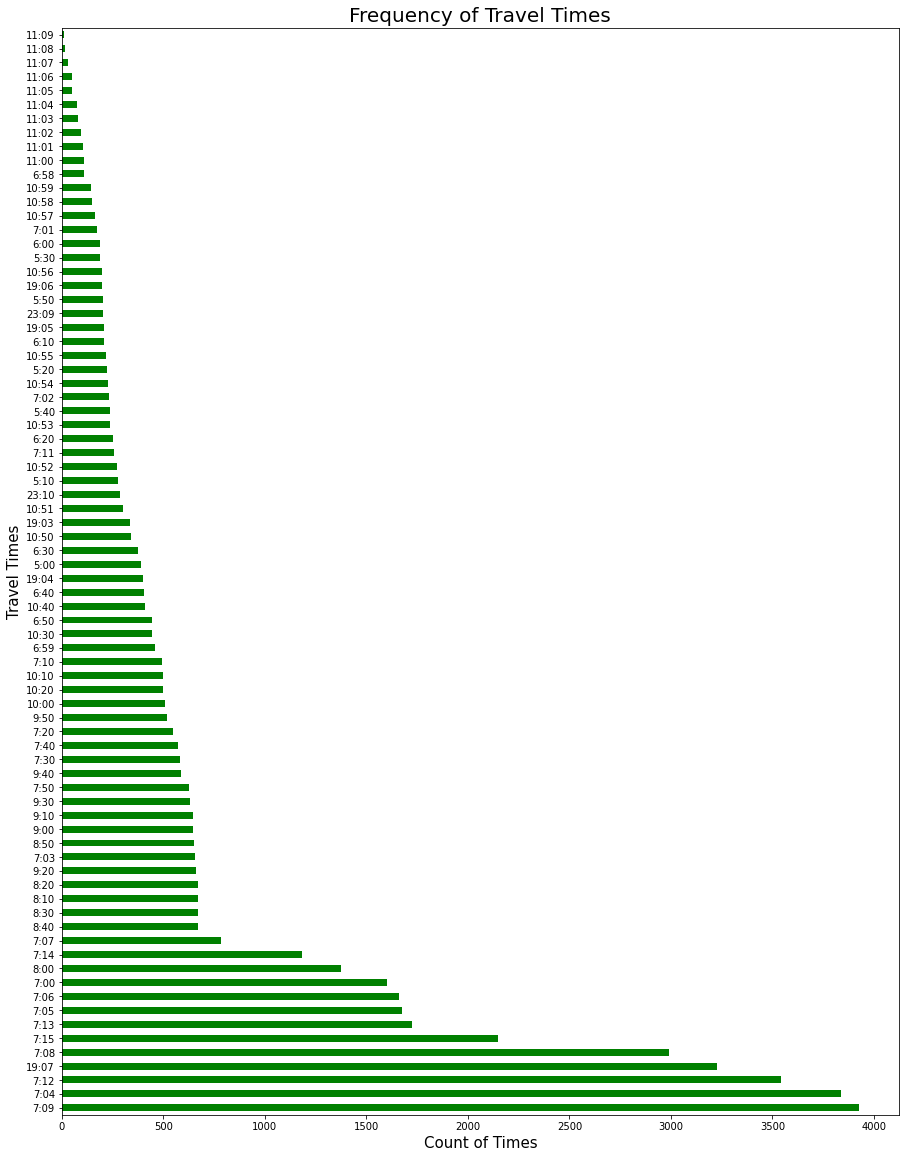

In [ ]:
df_1['travel_time'].value_counts().plot.barh(figsize=(15,20), color = 'g')
plt.ylabel('Travel Times', fontsize = 15)
plt.xlabel('Count of Times', fontsize = 15)
plt.xticks()
plt.title('Frequency of Travel Times', fontsize = 20)
plt.show()

In [ ]:
# Grouping the ride_id and seat_numbers to get Targetvariable

In [ ]:
target=df_1.groupby(['ride_id']).seat_number.count().rename('Tickets').reset_index()
target=target.drop_duplicates('ride_id')

In [ ]:
#Mergging data using leftjoin

In [ ]:
df=df_1.merge(target,how='left',on='ride_id')

In [ ]:
df.head(5)

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,Tickets
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49,1
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49,1
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49,1
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49,5
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49,31


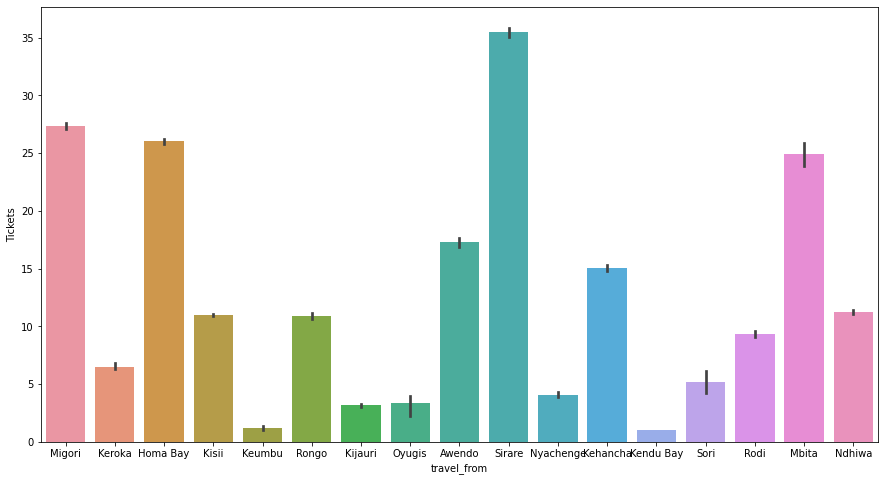

In [ ]:
  #plotting barplot 
plt.figure(figsize=(18,8))
sp=sns.barplot(x='travel_from',y='Tickets',data=df)

Inference: Maximum Tickets were from Sirare

In [ ]:
# Dropping the columns not required

In [ ]:
df = df.drop(['seat_number','payment_method','payment_receipt'], axis=1)

In [ ]:
df.columns

Index(['ride_id', 'travel_date', 'travel_time', 'travel_from', 'travel_to',
       'car_type', 'max_capacity', 'Tickets'],
      dtype='object')

In [ ]:
df.drop(['travel_to'],axis=1,inplace=True)

## **Feature Engineering**

In [ ]:
# concatinate travel date and travel time column and make a new feature called date.

In [ ]:
df['date']=df['travel_date']+" "+df['travel_time']
def  time_feature(data):

  ''' This function takes dataframe as an argument and extracts the different features
       from the data variable ofthe dataset and finally returns the updated dataset'''
  df['date']=pd.to_datetime(df['date'])
  df['day_of_week']=df['date'].dt.dayofweek
  df['day_of_year']=df['date'].dt.dayofyear
  df['day_of_month']=df['date'].dt.day
  df["year_woy"]=df["date"].dt.year.astype(str)+df["date"].dt.weekofyear.astype(str)
  df["hour"]=df["date"].dt.hour
  df["minute"]=df["date"].dt.minute
  df["is_weekend"]=df["day_of_week"].apply( lambda x : 1 if x  in [5,6] else 0 )
  df["year"]=df["date"].dt.year
  df["quarter"]=df["date"].dt.quarter
  df["month"]=df["date"].dt.month
  return data

In [ ]:
df_new = time_feature(df)

<ipython-input-127-48552a3e6a41>:10: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df["year_woy"]=df["date"].dt.year.astype(str)+df["date"].dt.weekofyear.astype(str)


In [ ]:
# checking information of new data frame df_new

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51645 entries, 0 to 51644
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   ride_id       51645 non-null  int64         
 1   travel_date   51645 non-null  object        
 2   travel_time   51645 non-null  object        
 3   travel_from   51645 non-null  object        
 4   car_type      51645 non-null  object        
 5   max_capacity  51645 non-null  int64         
 6   Tickets       51645 non-null  int64         
 7   date          51645 non-null  datetime64[ns]
 8   day_of_week   51645 non-null  int64         
 9   day_of_year   51645 non-null  int64         
 10  day_of_month  51645 non-null  int64         
 11  year_woy      51645 non-null  object        
 12  hour          51645 non-null  int64         
 13  minute        51645 non-null  int64         
 14  is_weekend    51645 non-null  int64         
 15  year          51645 non-null  int64 

<Axes: xlabel='day_of_month', ylabel='Tickets'>

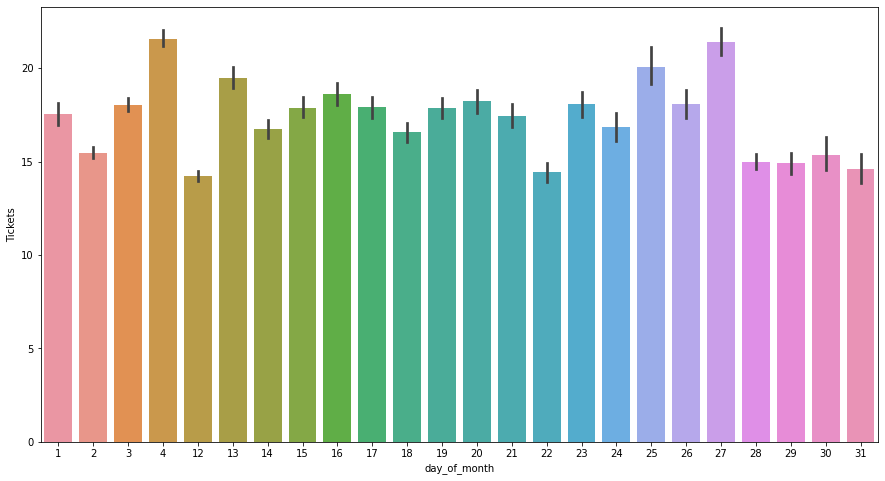

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(x='day_of_month',y='Tickets',data=df_new)

- It is observed that there is a gap between day 5 and day 11 of the month. We can  assume that public transports are not available in these days.
- The average frequency of tickets are stable through out the month.

<Axes: xlabel='hour', ylabel='Tickets'>

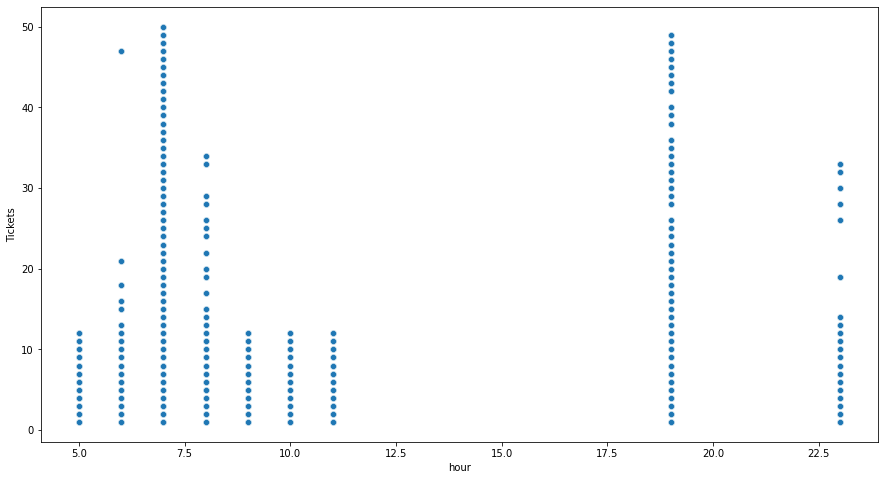

In [ ]:
plt.figure(figsize=(15, 8))

sns.scatterplot(x='hour', y="Tickets", data=df_new)

Inference:

- We can see that most of the ticktes were sold at 7:00 AM and 8:00 PM. And that seems true because in the morning most of the people go to work and in the evenings they return from office.

- From the above we can say that there is no ride available between 12pm to 5:30Pm

In [ ]:
# Replacing Categorical Values to Numerical Values

In [ ]:
df_new['car_type'].replace(['Bus', 'shuttle'],
                        [0, 1], inplace=True)

In [ ]:
df_new['travel_from'].unique()

array(['Migori', 'Keroka', 'Homa Bay', 'Kisii', 'Keumbu', 'Rongo',
       'Kijauri', 'Oyugis', 'Awendo', 'Sirare', 'Nyachenge', 'Kehancha',
       'Kendu Bay', 'Sori', 'Rodi', 'Mbita', 'Ndhiwa'], dtype=object)

In [ ]:
# Replacing Categorical values to numerical values

In [ ]:
df_new["travel_from"].replace(['Migori', 'Keroka', 'Homa Bay', 'Kisii', 'Keumbu', 'Rongo',
       'Kijauri', 'Oyugis', 'Awendo', 'Sirare', 'Nyachenge', 'Kehancha',
       'Kendu Bay', 'Sori', 'Rodi', 'Mbita', 'Ndhiwa'],[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16],inplace=True)

In [ ]:
# create variables columns not required and dropping few columns

In [ ]:
notreq = ["travel_date","travel_time","car_type","year_woy"]

In [ ]:
df_new.drop(columns = "travel_date",inplace= True)

In [ ]:
df_new.drop(columns = "travel_time",inplace= True)

In [ ]:
  df_new.drop(columns = "year_woy",inplace= True)

In [ ]:

df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51645 entries, 0 to 51644
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   ride_id       51645 non-null  int64         
 1   travel_from   51645 non-null  int64         
 2   car_type      51645 non-null  int64         
 3   max_capacity  51645 non-null  int64         
 4   Tickets       51645 non-null  int64         
 5   date          51645 non-null  datetime64[ns]
 6   day_of_week   51645 non-null  int64         
 7   day_of_year   51645 non-null  int64         
 8   day_of_month  51645 non-null  int64         
 9   hour          51645 non-null  int64         
 10  minute        51645 non-null  int64         
 11  is_weekend    51645 non-null  int64         
 12  year          51645 non-null  int64         
 13  quarter       51645 non-null  int64         
 14  month         51645 non-null  int64         
dtypes: datetime64[ns](1), int64(14)
memo

In [ ]:
df_new.head(5)

,ride_id,travel_from,car_type,max_capacity,Tickets,date,day_of_week,day_of_year,day_of_month,hour,minute,is_weekend,year,quarter,month
0,1442,0,0,49,1,2017-10-17 07:15:00,1,290,17,7,15,0,2017,4,10
1,5437,0,0,49,1,2017-11-19 07:12:00,6,323,19,7,12,1,2017,4,11
2,5710,1,0,49,1,2017-11-26 07:05:00,6,330,26,7,5,1,2017,4,11
3,5777,2,0,49,5,2017-11-27 07:10:00,0,331,27,7,10,0,2017,4,11
4,5778,0,0,49,31,2017-11-27 07:12:00,0,331,27,7,12,0,2017,4,11


In [ ]:
# useing heatmap for findding correlation

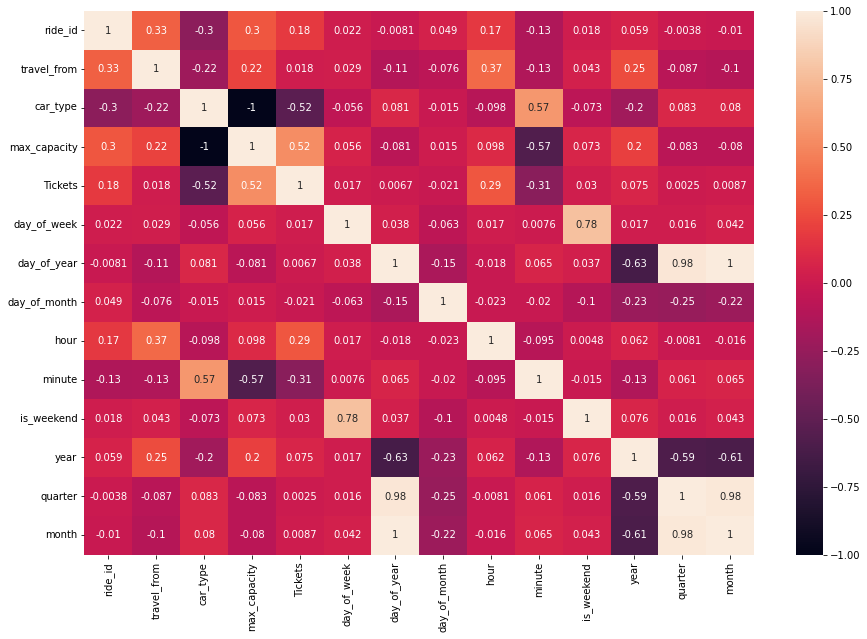

In [ ]:

corr_data = df_new.corr(method = 'pearson')
plt.figure(figsize = (15,10))
dataplot = sns.heatmap(corr_data,  annot=True)
plt.show()

In [ ]:
df_new.drop(columns = "date",axis=1,inplace= True)

In [ ]:
from sklearn import metrics
import math
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
import math
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [ ]:
#Getting X and Y variable
dependent_variable = 'Tickets'
independent_variables = list(set(df_new.columns.tolist()) - {dependent_variable})




In [ ]:
X = df_new[independent_variables].values
y = df_new[dependent_variable].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=42)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
regressor.intercept_
regressor.coef_
y_pred_train = regressor.predict(X_train)
y_pred = regressor.predict(X_test)

In [ ]:
# Intercept Values
regressor.intercept_

12.480237032965855

In [ ]:
# Coefficent Values
regressor.coef_

array([-27.35396735, -14.21706244,   0.72051997,   0.27439579,
        -2.84224641,   4.86157487,  19.31801018,   6.79013669,
         0.3325694 ,   1.06984518,  29.71356111,  -1.10049992,
        -6.79013669])

In [ ]:
# Mean Square Error 
mean_squared_error(y_test, y_pred)

94.20727224093356

In [ ]:
#R2 Score values for train and test split
r2_score(y_train, y_pred_train)

0.37718620690754867

In [ ]:
r2_score(y_test, y_pred)

0.3835700377411465

In [ ]:
print("Adjusted R2 : ",1-(1-r2_score(y_test, y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

Adjusted R2 :  0.3827931507310287


In [ ]:
# Implementing Lasso Regressor for Minimizing Error for quantitative response variable

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
X = df_new[independent_variables].values
y = df_new[dependent_variable].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=42)

alphas = [0.01,0.025,0.5,0.75,1]
for alpha in alphas:
  lasso  = Lasso(alpha=alpha , max_iter= 3000)
  lasso.fit(X_train, y_train)
  print('alpha: ',alpha)
  print('test Score: ',lasso.score(X_test, y_test))
  print('train Score: ',lasso.score(X_train, y_train))

alpha:  0.01
test Score:  0.3834101873683916
train Score:  0.3771325929056283
alpha:  0.025
test Score:  0.3830941114109182
train Score:  0.3770110920866686
alpha:  0.5
test Score:  0.381555084255942
train Score:  0.37551250730591756
alpha:  0.75
test Score:  0.3808933752351875
train Score:  0.37488630148303315
alpha:  1
test Score:  0.37998855590584457
train Score:  0.37401339765994457


In [ ]:
# Best Alpha and Max_iter Values

In [ ]:
lasso  = Lasso(alpha=0.01 , max_iter= 3000)
lasso.fit(X_train, y_train)

Lasso(alpha=0.01, max_iter=3000)

In [ ]:
# Y_test predicted values of MSE,RMSE,MAE

In [ ]:
y_test_pred = lasso.predict(X_test)

print('MSE is {}'.format(mean_squared_error(y_test, y_test_pred)))
print('RMSE is {}'.format(math.sqrt(mean_squared_error(y_test, y_test_pred))))
print('MAE is {}'.format(mean_absolute_error(y_test, y_test_pred)))

MSE is 94.23170172766511
RMSE is 9.707301464756574
MAE is 7.006064911405861


In [ ]:
# R2 and Adjusted R2 values

In [ ]:

r2 = r2_score(y_test, y_test_pred)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(y_test, y_test_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

R2 : 0.3834101873683916
Adjusted R2 :  0.38263309889876373


Inference: R2 for train and test split prediction is 0.38 we conclude that a model performance is low.

**Implementing Ridge Regressor**

In [ ]:
#Ridge regressor for the coefficients of multiple-regression models in scenarios where the independent variables are highly correlated

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
import sklearn.metrics as metrics

In [ ]:
#Hypertunning
X = df_new[independent_variables].values
y = df_new[dependent_variable].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42)
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.85973e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.49035e-22): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=9.51027e-22): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.2915e-22): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [ ]:
# Best fit Alpha Values

In [ ]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 5}

Using  {'alpha': 5}  the negative mean squared error is:  -95.75697187145106


In [ ]:
#R2 and Adjusted R2 values for Rigde Regressor

In [ ]:

y_pred_ridge = ridge_regressor.predict(X_test)
print(ridge_regressor.score(X_train,y_train))
print(ridge_regressor.score(X_test,y_test))



r2 = r2_score(y_test, y_pred_ridge)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(y_test, y_pred_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

-95.67797545785274
-94.21755588392266
R2 : 0.38028019506589816
Adjusted R2 :  0.3798070987323411


Inference:R2 for train and test split prediction is 0.38 we conclude that a model performance is still low.

**XGBoost Regressor**

In [ ]:
import xgboost as xgb

X = df_new[independent_variables].values
y = df_new[dependent_variable].values

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=42)
dreg= xgb.XGBRegressor(
                        booster= 'gbtree',
                        colsample_bylevel= 1,
                        colsample_bynode= 1,
                        colsample_bytree= 0.7,
                        eta= 0.004,
                        gamma= 0,
                        importance_type= 'gain',
                        learning_rate= 0.1,
                        max_delta_step= 0,
                        max_depth= 9,
                        min_child_weight= 10,
                        n_estimators= 100,
                        n_jobs= 1,
                        objective= 'reg:linear',
                        random_state= 0,
                        reg_alpha= 0,
                        reg_lambda= 1,
                        scale_pos_weight= 1,
                        subsample= 1,
                        verbosity= 1)
dreg.fit(X_train, y_train)
y_pred_train=dreg.predict(X_train)
y_pred = dreg.predict(X_test)
#Find R-squared value
r2 = r2_score(y_test, y_pred)
r2_train = r2_score(y_train, y_pred_train)
# Find Adjusted R-squared value
adj_r2=1-(1-r2_score(y_test, y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
train_score = dreg.score(X_train, y_train)
test_score = dreg.score(X_test,y_test)
print(f'Train score: {train_score}')
print(f'Test score: {test_score}')
adj_r2
r2
r2_train

[06:18:52] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
Train score: 0.969183200736511
Test score: 0.9638817483958656


0.969183200736511

In [ ]:
# R2 and Adjusted R2 values for XGBoost Regressor

In [ ]:
adj_r2

0.9638362285441106

In [ ]:
r2

0.9638817483958656

In [ ]:
r2_train

0.969183200736511

In [ ]:
print('MSE is {}'.format(mean_squared_error(y_test, y_pred)))

MSE is 5.519851678313449


In [ ]:
print('MAE is {}'.format(mean_absolute_error(y_test, y_pred)))

MAE is 1.5327385196164547


Inference: R2 for train and test split prediction is 0.92 we conclude that a model performance is very high and fall under the accepted range.

We will be using algorithms for each :

GridSearchCV

Hypertunning

In [ ]:
import xgboost as xgb

xgb = xgb.XGBRegressor()

In [ ]:

# Parameters for Hypertunning

In [ ]:
params = {"min_child_weight":[10,20], 
            'eta': [0.004,0.04,4,40], 
            'colsample_bytree':[0.7], 
            'max_depth': [7,9,11],
          
          }

In [ ]:
# Gridsearchcv implementation

In [ ]:
X = df_new[independent_variables].values
y = df_new[dependent_variable].values

# X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42)
reg_gs = GridSearchCV(xgb,param_grid=params, verbose=1,cv=3)
reg_gs.fit(X, y)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/base.py", line 723, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_regression.py", line 911, in r2_score
    y_type, y_true, y_pred, multioutput = _check_reg_targets(
  File "/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_regression.py", line 102, in _check_reg_targets
    y_pred = check_array(y_pred, en

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             param_grid={'colsample_bytree': [0.7], 'eta': [0.004, 0.04, 4, 40],
                         'max_depth': [7, 9, 11],
                         'min_child_weight': [10, 20]},
             verbose=1)

In [ ]:

# Best Estimotor parameters

In [ ]:
reg_gs.best_estimator_.get_params()

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': 0.7,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': 7,
 'max_leaves': None,
 'min_child_weight': 20,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None,
 'eta': 0.04}

In [ ]:
reg_optimal_model =reg_gs.best_estimator_
train_preds = reg_optimal_model.predict(X_train)
test_preds = reg_optimal_model.predict(X_test)

In [ ]:
reg_optimal_model.score(X_train,y_train)
reg_optimal_model.score(X_test,y_test)

0.8586773844998837

In [ ]:
r2_test = r2_score(y_test, test_preds)
adj_r2=1-(1-r2_score(y_test, test_preds))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))

In [ ]:
# R2 and Adjusted R2 values for GridsearchCV regressor

In [ ]:
print(r2_test)
print(adj_r2)

0.8586773844998837
0.8584992755322152


In [ ]:
print('MAE is {}'.format(mean_absolute_error(y_test, test_preds)))

MAE is 3.3694923449261154


In [ ]:
print('MSE is {}'.format(mean_squared_error(y_test, test_preds)))

MSE is 21.597941254240215
